In [59]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [61]:
df.shape

(107, 2)

In [62]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
Month                                                     106 non-null object
Perrin Freres monthly champagne sales millions ?64-?72    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [64]:
df.isna().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [65]:
df[df['Perrin Freres monthly champagne sales millions ?64-?72'].isna()]

,Month,Perrin Freres monthly champagne sales millions ?64-?72
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [66]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [67]:
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [68]:
df.drop([106,105],axis=0,inplace=True)

In [69]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [70]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [71]:
# Converting object dtype to datetime format

df['Month'] = pd.to_datetime(df['Month'])

In [72]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [73]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [74]:
# Set index to months

df.set_index('Month',inplace=True)

In [75]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [76]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Setp 2: Data Visualization

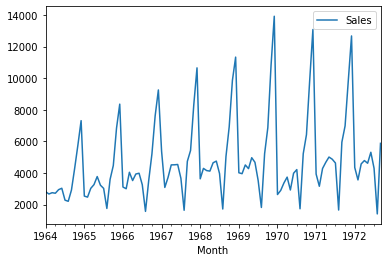

In [77]:
df.plot()

In [78]:
### Testing for stationarity (Augumented dickifuller test)

from statsmodels.tsa.stattools import adfuller
#H0 : it is non stationary
#H1 : it is stationary

def adfuller_test(sales):
    result = adfuller(sales)
    print (f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("stronge evedience against the null hypothesis (H0), Reject the null Hypothesis indicating it is stationary")
    else:
        print("Week evidence against the null hypothesis, indicating it is not stationary")

In [79]:
adfuller_test(df['Sales'])

p-value: 0.3639157716602417
Week evidence against the null hypothesis, indicating it is not stationary


In [80]:
df['Sales'].shift(1).head(10)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
1964-06-01    2946.0
1964-07-01    3036.0
1964-08-01    2282.0
1964-09-01    2212.0
1964-10-01    2922.0
Name: Sales, dtype: float64

In [81]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [82]:
df['Sales First Difference'].head(10)

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
1964-06-01      90.0
1964-07-01    -754.0
1964-08-01     -70.0
1964-09-01     710.0
1964-10-01    1379.0
Name: Sales First Difference, dtype: float64

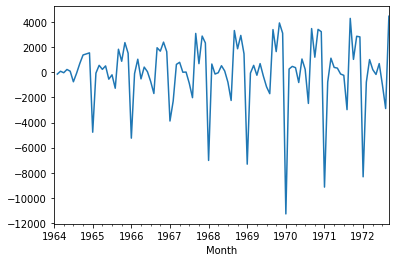

In [83]:
df['Sales First Difference'].plot()

In [84]:
df['Sales First Difference'].isna().sum()

1

In [85]:
df['Sales First Difference'].dropna(inplace = True)

In [86]:
df['Sales First Difference'].isna().sum()

0

In [87]:
adfuller_test(df['Sales First Difference'])

p-value: 2.519620447386778e-10
stronge evedience against the null hypothesis (H0), Reject the null Hypothesis indicating it is stationary


# Auto Regressive Model

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

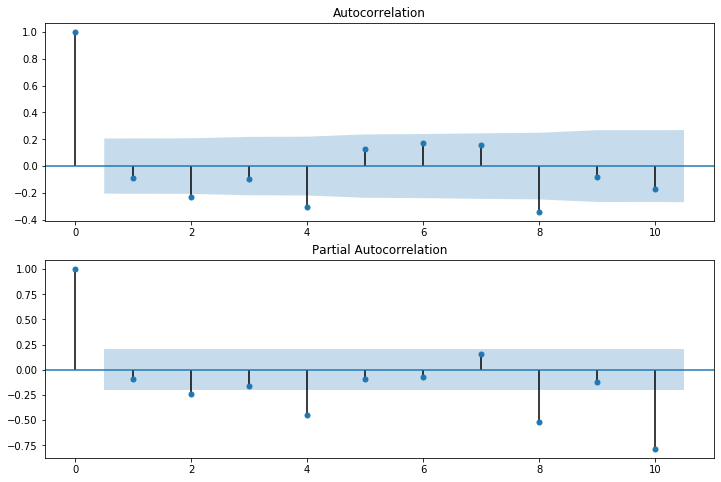

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Sales First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Sales First Difference'].iloc[13:],lags=10,ax=ax2)

In [90]:
# for non seasonal data

# p = 1, q = 1, d = 1

from statsmodels.tsa.arima_model import ARIMA

In [91]:
model = ARIMA(df['Sales'],order=(1,1,1))
model_fit = model.fit()

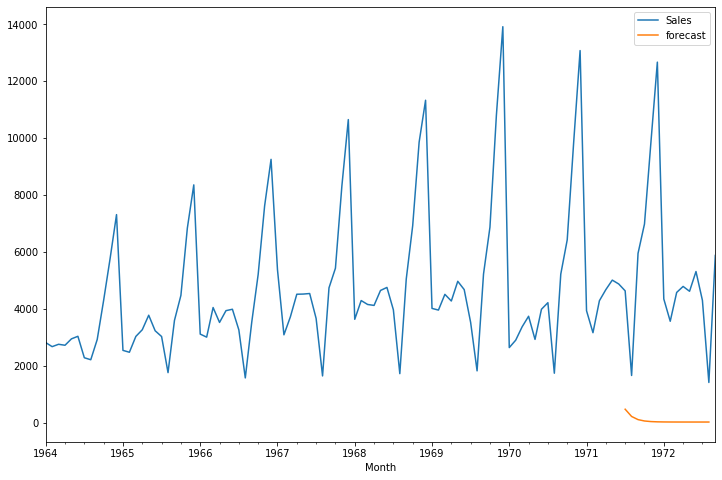

In [92]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [94]:
import statsmodels.api as sm

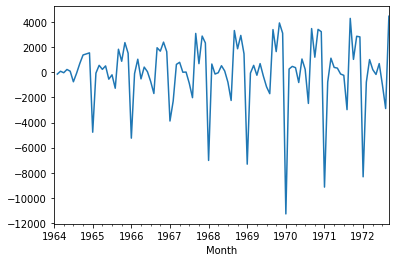

In [100]:
df['Sales First Difference'].plot()

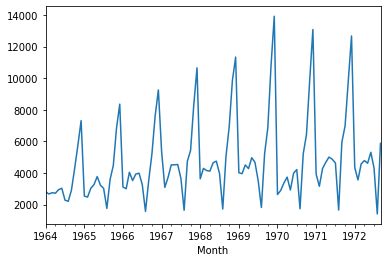

In [101]:
df['Sales'].plot()

In [102]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12) # same patern after every 12 months (seasonality)

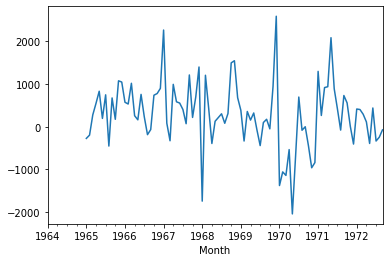

In [104]:
df['Seasonal First Difference'].plot()

In [105]:
# Again performing dicki fuller test

adfuller_test(df['Seasonal First Difference'].dropna())

p-value: 2.060579696813685e-11
stronge evedience against the null hypothesis (H0), Reject the null Hypothesis indicating it is stationary


In [106]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

In [107]:
result = model.fit()

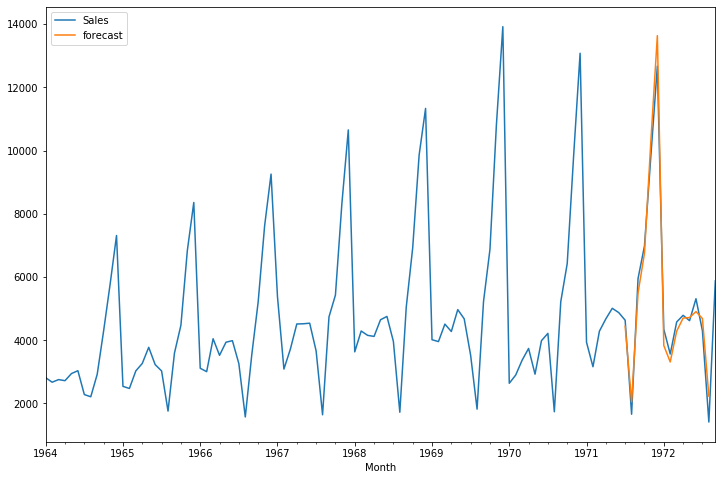

In [109]:
df['forecast']=result.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [110]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [111]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [112]:
future_df=pd.concat([df,future_datest_df])

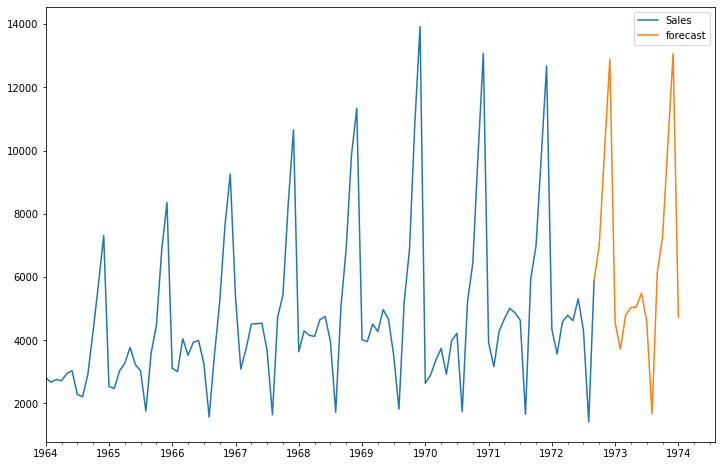

In [114]:
future_df['forecast'] = result.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 